In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/world-stock-prices-daily-updating")

print("Path to dataset files:", path)

/home/josh/Documents/Che7700/ChE7700HomeWork/homeWork/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 11.9M/11.9M [00:26<00:00, 470kB/s] 

Extracting files...


Path to dataset files: /home/josh/.cache/kagglehub/datasets/nelgiriyewithana/world-stock-prices-daily-updating/versions/400


In [ ]:
df = pd.read_csv("World-Stock-Prices-Dataset.csv").convert_dtypes()
print(df.dtypes)


Date             string[python]
Open                    Float64
High                    Float64
Low                     Float64
Close                   Float64
Volume                    Int64
Brand_Name       string[python]
Ticker           string[python]
Industry_Tag     string[python]
Country          string[python]
Dividends               Float64
Stock Splits            Float64
Capital Gains             Int64
dtype: object


In [34]:
df_numeric = df.select_dtypes(exclude=['string'])
df_numeric_replace = df_numeric.replace(0, 1)
df_numeric_replace =  df_numeric_replace.fillna(1)
print(df_numeric.dtypes)

Open             Float64
High             Float64
Low              Float64
Close            Float64
Volume             Int64
Dividends        Float64
Stock Splits     Float64
Capital Gains      Int64
dtype: object


In [35]:
print("Data Set Description: ")
print(df.describe())


Data Set Description: 
              Open         High         Low        Close           Volume  \
count     310122.0     310122.0    310122.0     310122.0         310122.0   
mean     76.325431    77.198011   75.434586    76.338032  22709366.044795   
std      141.68407   143.224109  140.063617   141.679129  85657437.802224   
min            0.0          0.0         0.0     0.198861              0.0   
25%        15.9325    16.163165   15.710323        15.94        1379050.0   
50%       35.40812    35.809869   34.982469    35.407547        4591641.5   
75%      83.996691    84.914656   83.088609         84.0       12128600.0   
max    3445.580078  3463.070068      3370.0  3427.610107     7421640800.0   

       Dividends  Stock Splits  Capital Gains  
count   310122.0      310122.0            2.0  
mean    0.003643      0.000875            0.0  
std     0.069905      0.115434            0.0  
min          0.0           0.0            0.0  
25%          0.0           0.0            0

In [36]:
print(df_numeric_replace.dtypes)
print(df_numeric_replace.describe)

Open             Float64
High             Float64
Low              Float64
Close            Float64
Volume             Int64
Dividends        Float64
Stock Splits     Float64
Capital Gains      Int64
dtype: object
<bound method NDFrame.describe of               Open        High         Low       Close    Volume  Dividends  \
0             6.63        6.74       6.615        6.64   4209664        1.0   
1           106.75  108.370003  106.330101  107.339996    560190        1.0   
2       122.629997  123.050003  121.550003      121.93     36600        1.0   
3       221.705002  224.009995  221.360001  223.410004  29295154        1.0   
4       212.145004  214.649994  211.810104  213.550003  34697317        1.0   
...            ...         ...         ...         ...       ...        ...   
310117   38.147537   38.255972   35.935457   37.496925  53076000        1.0   
310118   25.215814   25.330655   24.690826   24.772856   2173400        1.0   
310119   72.313085   72.405794   71.75683

In [40]:
norm_scaler = MinMaxScaler()
data_norm = norm_scaler.fit_transform(df_numeric_replace)
df_norm = pd.DataFrame(data_norm, columns=df_numeric_replace.columns)
 
std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(df_numeric_replace)
df_std = pd.DataFrame(data_std, columns=df_numeric_replace.columns)
 
 
comparison = pd.DataFrame({
    "Metric": ["Min", "Max", "Mean", "Std"],
    "Original": [df_numeric_replace.min().min(), df_numeric_replace.max().max(), df_numeric_replace.mean(), df_numeric_replace.values.std()],
    "Normalized": [df_norm.min().min(), df_norm.max().max(), df_norm.values.mean(), df_norm.values.std()],
    "Standardized": [df_std.min().min(), df_std.max().max(), df_std.values.mean(), df_std.values.std()]
})
 
print('Comparison Table:\n', comparison.round(3))

Comparison Table:
   Metric                                           Original  Normalized  \
0    Min                                              0.003       0.000   
1    Max                                       7421640800.0       1.000   
2   Mean  Open                   76.325435
High         ...       0.021   
3    Std                                    31201807.107022       0.035   

   Standardized  
0       -12.487  
1       451.221  
2        -0.000  
3         0.935  


In [42]:
print(df_numeric_replace.dtypes)
df_std1 = df_std.head(5000)

Open             Float64
High             Float64
Low              Float64
Close            Float64
Volume             Int64
Dividends        Float64
Stock Splits     Float64
Capital Gains      Int64
dtype: object


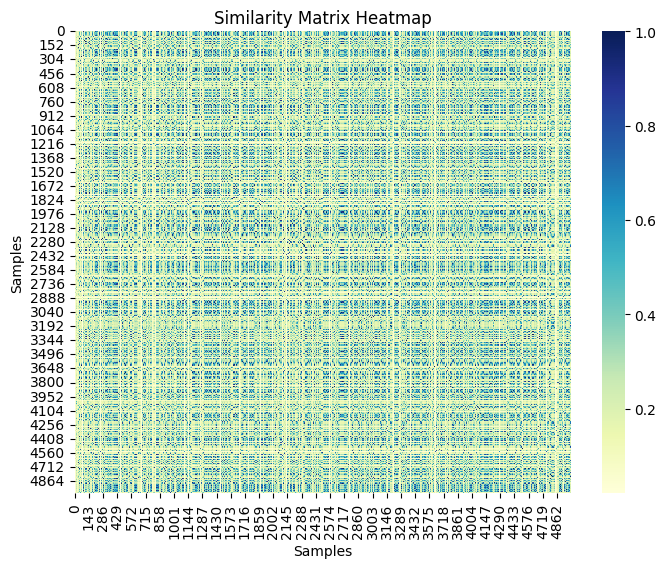

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
 
 
dist_vector = pdist(df_std1, metric='cityblock')
 
similarity_vector = 1 / (1 + dist_vector)
 
sim_matrix = squareform(similarity_vector)
 
np.fill_diagonal(sim_matrix, 1.0)
 
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, annot=False, cmap='YlGnBu')
plt.title('Similarity Matrix Heatmap')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
val_pact = 15
test_pct = 10
 
test_size = test_pct / 100
val_size = val_pact / (100 - test_pct)
X = df_numeric
 
X_train_val, X_test = train_test_split(df_numeric_replace, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train_val, test_size=val_size, random_state=42)
 
print(f"Training set size: {X_train.shape} (approx samples: {X_train.shape[0]})")
print(f"Validation set size: {X_val.shape} (approx samples: {X_val.shape[0]})")
print(f"Test set size: {X_test.shape} (approx samples: {X_test.shape[0]})")
print(f"Total samples: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")

Training set size: (206747, 8) (approx samples: 206747)
Validation set size: (41350, 8) (approx samples: 41350)
Test set size: (62025, 8) (approx samples: 62025)
Total samples: 310122


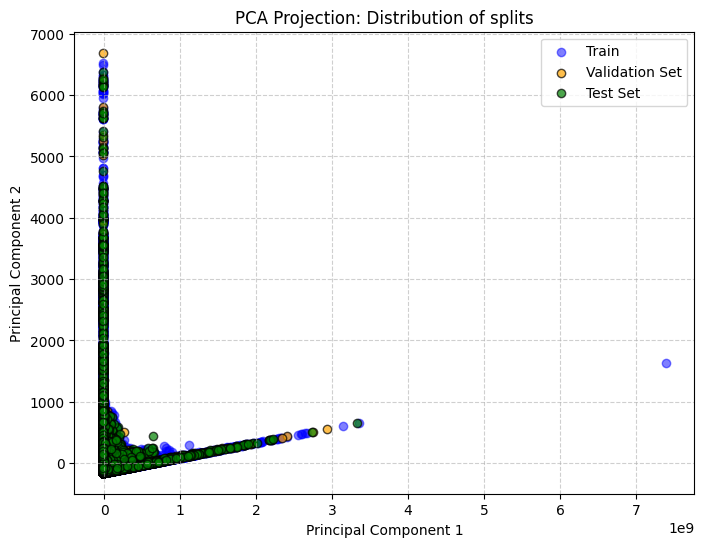

In [48]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_val = pca.transform(X_val)
pca_test = pca.transform(X_test)


plt.figure(figsize=(8,6))
plt.scatter(pca_train[:,0], pca_train[:,1],alpha=0.5, label ="Train", c="blue")
plt.scatter(pca_val[:, 0], pca_val[:, 1], c='orange',
            label='Validation Set', alpha=0.7, edgecolors='k')
plt.scatter(pca_test[:, 0], pca_test[:, 1], c='green',
            label='Test Set', alpha=0.7, edgecolors='k')
 
plt.title('PCA Projection: Distribution of splits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()